# vDataFrame.score

In [ ]:
vDataFrame.score(y_true: str, 
                 y_score: str,
                 method: str)

Computes the score using the input columns and the input method.

### Parameters

<table id="parameters">
    <tr> <th>Name</th> <th>Type</th> <th>Optional</th> <th>Description</th> </tr>
    <tr> <td><div class="param_name">y_true</div></td> <td><div class="type">str</div></td> <td><div class = "no">&#10060;</div></td> <td>Response column.</td> </tr>
    <tr> <td><div class="param_name">y_score</div></td> <td><div class="type">str</div></td> <td><div class = "no">&#10060;</div></td> <td>Prediction.</td> </tr>
    <tr> <td><div class="param_name">method</div></td> <td><div class="type">str</div></td> <td><div class = "no">&#10060;</div></td> <td>The method used to compute the score.<br>
        <br>For Classification:
                                                    <ul>
                                                        <li><b>accuracy :</b> Accuracy</li>
                                                        <li><b>auc :</b> Area Under the Curve (ROC)</li>
                                                        <li><b>best_cutoff :</b> Cutoff which optimised the ROC Curve prediction.</li>
                                                        <li><b>bm :</b> Informedness = tpr + tnr - 1</li>
                                                        <li><b>csi :</b> Critical Success Index = tp / (tp + fn + fp)</li>
                                                        <li><b>f1 :</b> F1 Score</li>
                                                        <li><b>logloss :</b> Log Loss </li>
                                                        <li><b>mcc :</b> Matthews Correlation Coefficient</li>
                                                        <li><b>mk :</b> Markedness = ppv + npv - 1</li>
                                                        <li><b>npv :</b> Negative Predictive Value = tn / (tn + fn)</li>
                                                        <li><b>prc_auc :</b>  Area Under the Curve (PRC)</li>
                                                        <li><b>precision :</b> Precision = tp / (tp + fp)</li>
                                                        <li><b>recall :</b> Recall = tp / (tp + fn)</li>
                                                        <li><b>specificity :</b> Specificity = tn / (tn + fp)</li></ul>
        <br>For Regression:<br>
                                                        <ul><li><b>max :</b> Max Error</li>
                                                        <li><b>mae :</b> Mean Absolute Error</li>
                                                        <li><b>median :</b> Median Absolute Error</li>
                                                        <li><b>mse :</b> Mean Squared Error</li>
                                                        <li><b>msle :</b> Mean Squared Log Error</li>
                                                        <li><b>r2 :</b> R squared coefficient</li>
                                                        <li><b>var :</b> Explained Variance</li></ul>
        <br>Plots:<br>
                                                        <ul><li><b>roc :</b> ROC Curve</li>
                                                        <li><b>prc :</b> PRC Curve</li>
                                                            <li><b>lift :</b> Lift Chart</li></ul></td> </tr>
</table>

### Returns

<b>float / tablesample</b> : score / tablesample of the curve

### Example

In [11]:
from vertica_ml_python.learn.datasets import load_titanic
titanic = load_titanic().select(["age", "fare", "survived"])
print(titanic)

,age,fare,survived
0,2.000,151.55000,0
1,30.000,151.55000,0
2,25.000,151.55000,0
3,39.000,0.00000,0
4,71.000,49.50420,0
,...,...,...


<object>  Name: titanic, Number of rows: 1234, Number of columns: 3


In [12]:
from vertica_ml_python.learn.linear_model import LogisticRegression
model = LogisticRegression(name = "public.LR_titanic",
                           tol = 1e-4, 
                           C = 1.0, 
                           max_iter = 100, 
                           solver = 'CGD',
                           l1_ratio = 0.5)
model.fit("public.titanic", ["fare", "age"], "survived")
model.predict(titanic, name = "survived_pred")

,age,fare,survived,survived_pred
0,2.000,151.55000,0,0.902287137987944
1,30.000,151.55000,0,0.86058029983458
2,25.000,151.55000,0,0.868988340490406
3,39.000,0.00000,0,0.342456823846109
4,71.000,49.50420,0,0.414029113989722
,...,...,...,...


<object>  Name: titanic, Number of rows: 1234, Number of columns: 4

In [13]:
# Computing AUC
titanic.score(y_true  = "survived", 
              y_score = "survived_pred",
              method  = "auc")

0.6974762740166146

In [14]:
# Computing MSE
titanic.score(y_true  = "survived", 
              y_score = "survived_pred",
              method  = "mse")

0.224993557369594

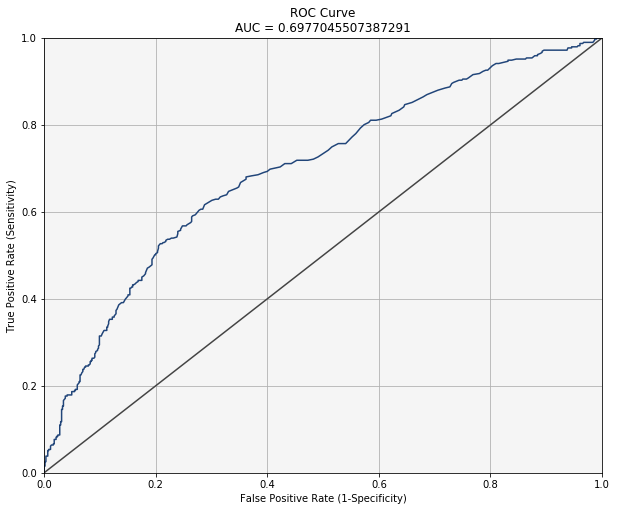

In [16]:
# Drawing ROC Curve
titanic.score(y_true  = "survived", 
              y_score = "survived_pred",
              method  = "roc")

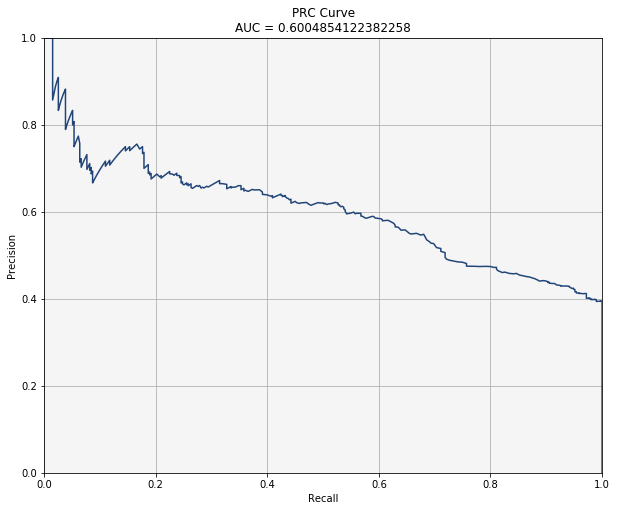

In [19]:
# Drawing PRC Curve
titanic.score(y_true  = "survived", 
              y_score = "survived_pred",
              method  = "prc")

### See Also

<table id="seealso">
    <tr><td><a href="../agg">vDataFrame.aggregate</a></td> <td>Computes the vDataFrame input aggregations.</td></tr>
</table>